## Model description
We are using a linearized differential equation model of $CO_2$ and $HCO_3^{-}$ fluxes across the cell membrane and inside the cytosol. 

$\frac{dC_{in}}{dt} = \alpha (C_{out} - C_{in}) - \gamma C_{in} - \delta C_{in} + \phi H_{in}$

$\frac{dH_{in}}{dt} = \beta (H_{out} - H_{in}) + \delta C_{in} - \phi H_{in} - \omega H_{in}$

Here $C_{in}$ and $H_{in}$ are the intracellular $CO_2$ and $HCO_3^{-}$ concentrations respectively. $C_{out}$ and $H_{out}$ are the extracellular concentrations, which we assume to be in a pH-dependent equilibrium such that

$\frac{H_{out}}{C_{out}} = K_{EQ}(pH)$

In this linearized system, $\gamma C_{in}$ represents the rate of intracellular $CO_2$ fixation by rubisco and $\delta C_{in} - \phi H_{in}$ is the balance of the reversible $CO_2$ hydration reaction by carbonic anhydrase. $\alpha$ and $\beta$ are permeability coefficients for $CO_2$ and $HCO_3^{-}$, respectively, and $\omega H_{in}$ is the rate of $HCO_3^{-}$ dependent carboxylation. Note that several $HCO_3^{-}$ dependent carboxylation are required for the production of key precursors of lipids, amino acids and proteins. Hereafter we refer to carboxylation of $HCO_3^{-}$ as "H-carboxylation." 

## Assumptions
As the diffusion coefficients associated with small molecules (e.g. $CO_2$ and $HCO_3^{-}$) in water are ≈1000 $\mu m^2 /s$, such molecules diffuse very quickly across the micron length scales of bacterial cells with diffusion timescales $< 10^{-3}$. As a result, we assume spatial uniformity of $H_{in}$ and $C_{in}$ concentrations. We are also assuming a constant concentration of the rubisco co-substrate, ribulose 1,5-bisphosphate or RuBP, so that we can ignore this concentration when considering the reaction rate. 

Enzymatic rates are typically described as non-linear saturating functions of substrate concentrations. An irreversible Michaelis-Menten rate law has the form $V = k_{cat} [E] \frac{[S]}{K_M + [S]}$ where $[E]$ and $[S]$ are the enzyme and substrate concentrations respectively. In order to linearize this equation, we assume for both rubisco and carbonic anhydrase that $[S] \ll K_M$ so that $V \approx \frac{k_{cat}}{K_M} [E] [S]$. This assumption is reasonably justified as a the equilibrium $CO_2$ concentration is $\approx 15 \mu M$ while the typical bacterial rubisco has a $K_M \approx 100 \mu M$. Similarly, typical $K_M$ values for carbonic anhydrases are in the $1-5 mM$ range. 

As $CO_2$ is smaller than $HCO_3^{-}$ and uncharged, it is typical to assume that the membrane permeability $\beta \ll \alpha$. We will not explicitly encode this assumption in the equations. Instead, we will plug in plausible empirically-derived values for $\beta$ and $\alpha$. 

## Steady-state solutions
We can solve this system at steady-state, which gives steady-state values for $C_{in}$ and $H_{in}$ as a function of the other parameters. In particular, we can calculate the flux through rubisco as

$\gamma C_{in} = \frac{\gamma  C_{out} (\alpha  (\beta +\omega +\phi )+\beta  K_{EQ}(pH) \phi
   )}{\alpha  (\beta +\omega +\phi )+\beta  (\gamma +\delta )+\gamma  \omega +\gamma 
   \phi +\delta  \omega }$
   
Similarly, we can calculate the rate of H-dependent carboxylation as 

$\omega H_{in} = \frac{C_{out} \omega  (\alpha  \delta +\beta  K_{EQ}(pH) (\alpha +\gamma
   +\delta ))}{\alpha  (\beta +\omega +\phi )+\beta  (\gamma +\delta )+\gamma  \omega
   +\gamma  \phi +\delta  \omega }$
   
Since rubisco and H-carboxylation are together responsible for the production of biomass carbon, we'll further assume that the rate of biomass production and, hence, the exponential growth rate $\lambda \propto \min(c \omega H_{in}, \gamma C_{in})$. Here $c \gg 1$ is a constant of proportionality reflecting the lesser contribution of H-carboxylation to biomass production. We will assume for the sake of plotting that $c = 100$, meaning that H-carboxylation contributes 1% of biomass carbon on a flux basis.  A more precise range of values could be calculated via flux balance analysis of autotrophic metabolism. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
# Lengths in micron units
cell_SA = 6 # square microns, BNID 101792
cell_V = 1.5 # cubic microns, BNID 114924
C_perm = 0.3*1e4 # microns/s, Flamholz & Mangan 2016
H_perm = 3e-3*1e4*np.power(10, 3.2-7.1) # microns/s, Flamholz & Mangan 2016

alpha = C_perm * cell_SA / cell_V
beta = H_perm * cell_SA / cell_V
print('alpha = {:1g} /s'.format(alpha))
print('beta = {:1g} /s'.format(beta))
print()

# Concentrations in micromolar units
pH_out = 7.1
pKa_eff = 6.1 # effective pKa between CO2 and bicarb
Cout = 15
Keq_pH = lambda p: np.power(10, p-pKa_eff)
Keq_out = Keq_pH(pH_out)
Hout = Keq_out*Cout

print('pH_out = {:1g}'.format(pH_out))
print('KEQ_out(pH) = {:1g}'.format(Keq_out))
print('Cout = {:1g} uM'.format(Cout))
print('Hout = {:1g} uM'.format(Hout))
print()

# We'll simplify the system by assuming pHout = pHin
pH_in = pH_out
Keq_in = Keq_pH(pH_in)
print('pH_in = {:1g}'.format(pH_in))
print('KEQ_in(pH) = {:1g}'.format(Keq_in))
# This forces a relationship between the CA kinetics (Haldane relation)
# Where KEQ = delta/phi = Hin/Cin at equilibrium

# We'll further assume that the H carboxylation is ≈1% of rubisco rate
# since rubisco is responsible for biomass carbon and H-carboxylation is
# responsible for much less. 10% is probably an overestimate. Regardless
# gamma = 10*omega

alpha = 12000 /s
beta = 0.0151071 /s

pH_out = 7.1
KEQ_out(pH) = 10
Cout = 15 uM
Hout = 150 uM

pH_in = 7.1
KEQ_in(pH) = 10


In [3]:
# Calculate the rubisco flux as a function of other params
def rub_flux(a, b, g, d, phi, omega, c_out, k_eq):
    numerator = g * c_out * (a*(b+omega+phi) + b*k_eq*phi)
    denom = (a*(b+omega+phi) + b*(g+d) + 
             g*omega + g*phi + d*omega)
    return numerator/denom

# Calculate the flux through H-carboxylation as a function of the other params. 
def hcarb_flux(a, b, g, d, phi, omega, c_out, k_eq):
    numerator = omega * c_out * (a*d + b*k_eq*(a+g+d))
    denom = (a*(b+omega+phi) + b*(g+d) + 
             g*omega + g*phi + d*omega)
    return numerator/denom

In [4]:
# Gamma is rubisco kcat/KM * enzyme concentration
# kcat ≈ 1-10 /s
# KM ≈ 100 uM
# concentration 1-100 uM
# so gamma is from 1e-2 to 1e3 /s
gamma = np.logspace(-2,3,100) # /s

# Delta is CA kcat/KM * enzyme concentration
# kcat / KM ≈ 1e-2 - 1e1 /uM/s depending on CA
# concentration 0.1-10 uM
# so delta is from 1e-3 to 1e2 /s for a CA.
# we will go much lower because we want to consider no CA at all. 
delta = np.logspace(-3,2,100) # /s

# 2d grid of rubisco and CA rates
G, D = np.meshgrid(gamma, delta)

# Omega is 1% of rubisco gamma
Omega = G / 100

# As we said above, phi = delta/KEQ
Phi = D / Keq_in

rub_fluxes = rub_flux(alpha, beta, G, D, Phi, Omega, Cout, Keq_pH(pH_in))
hcarb_fluxes = hcarb_flux(alpha, beta, G, D, Phi, Omega, Cout, Keq_pH(pH_in))

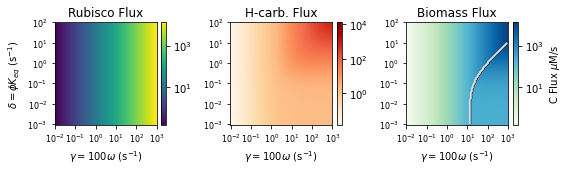

In [6]:
fig, axs = plt.subplots(ncols=3, figsize=(8,4))

plt.sca(axs[0])
lnorm = LogNorm(rub_fluxes.min(), rub_fluxes.max())
plt.imshow(rub_fluxes, norm=lnorm, origin='lower')
plt.colorbar(fraction=0.046, pad=0.04)

plt.xlabel('$\gamma = 100 \omega$ (s$^{-1}$)')
plt.ylabel('$\delta = \phi K_{eq}$ (s$^{-1}$)')
plt.title('Rubisco Flux')

plt.sca(axs[1])
lnorm = LogNorm(hcarb_fluxes.min(), rub_fluxes.max())
plt.imshow(hcarb_fluxes, norm=lnorm, cmap='OrRd', origin='lower')
plt.colorbar(fraction=0.046, pad=0.04)

plt.xlabel('$\gamma = 100 \omega$ (s$^{-1}$)')
plt.title('H-carb. Flux')

plt.sca(axs[2])
biomass_c_flux = np.minimum(rub_fluxes, 100*hcarb_fluxes)
lnorm = LogNorm(biomass_c_flux.min(), biomass_c_flux.max())
plt.imshow(biomass_c_flux, norm=lnorm, cmap='GnBu', origin='lower')
plt.colorbar(fraction=0.046, pad=0.04, label='C Flux $\mu$M/s')

# Draw the boundary where rubisco becomes growth-limiting.
mask = np.where(rub_fluxes < 100*hcarb_fluxes)
boundary = np.zeros(biomass_c_flux.shape)
boundary[mask] = 1
plt.contour(boundary, cmap='gray')
                    
plt.xlabel('$\gamma = 100 \omega$ (s$^{-1}$)')
plt.title('Biomass Flux')

# x & y ticks with values
xs = np.arange(0, 101, 20)
ys = np.arange(0, 101, 20)
for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(xs, [r'$10^{%d}$' % i for i in range(-2,4)], fontsize=8)
    plt.yticks(ys, [r'$10^{%d}$' % i for i in range(-3,3)], fontsize=8)

plt.tight_layout()
plt.show()